# **3D plotting with Matplotlib**


## 1. Introduction

Matplotlib is a 2D and 3D graphics library for generating scientific figures.

Figures are controlled *programmatically*, i.e. you can script it, ensure reproducibility and re-use.

**Advantages**

* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI.
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).


More information at the Matplotlib web page: http://matplotlib.org/

## 1.1. Getting Started

In IPython notebook via magic commands

In [ ]:
# ipython magic command:
# This line loads matplotlib package for ipython notebook
# and configures matplotlib to show figures embedded in the notebook,
# instead of poping up a new window.
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In Python modules via import of pylab (which also imports other modules like scipy)

In [ ]:
from pylab import *

or only mathplotlib plot via:

In [ ]:
import matplotlib.pyplot as plt

## 2. The Plotting API



### 2.1. Using mathplotlib in global namespace


* The easiest way to get started with plotting using matplotlib is often to use the MATLAB-like API provided by matplotlib.

* It is designed to compatible with MATLAB's plotting functions, so it is easy to get started with if you are familiar with MATLAB.

* It maintains a global object against which all painting commands are done. The global object can be switched with the `figure()` function

* To use this API from matplotlib, we need to include the symbols in the `pylab` module (imports all functions in global namespace):

In [ ]:
from pylab import *

#### Comments on MATLAB-style API

**Pro**
* Similar to MATLAB, so easy to get started by those who know the API
* Minimum coding overhead
* Nice in interactive explorations

**Contra**
* Keep track of the state of the figure in your head
* Can become complex for larger figures
* No ojbect oriented view


##### Pie Charts


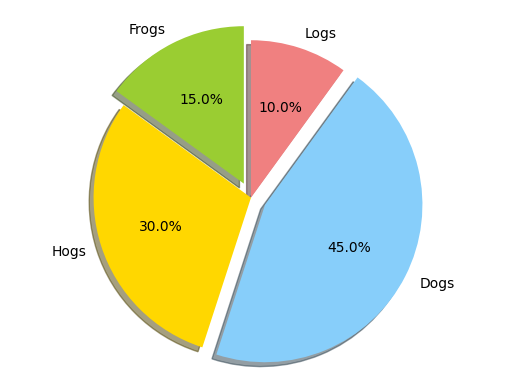

In [ ]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0.1, 0, 0.1, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

##### Polar Plots

Plot data in polar coordinates as line chart

In [ ]:
pi

3.141592653589793

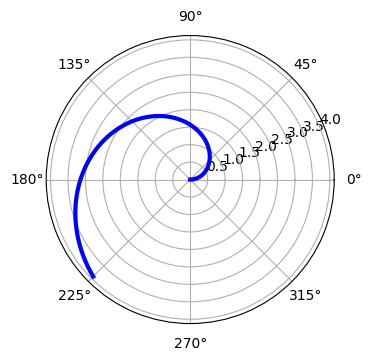

In [ ]:
# polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = linspace(0, 5/4*pi, 100)
ax.plot(t, t, color='blue', lw=3);

**Polar Plot Bar Chart**

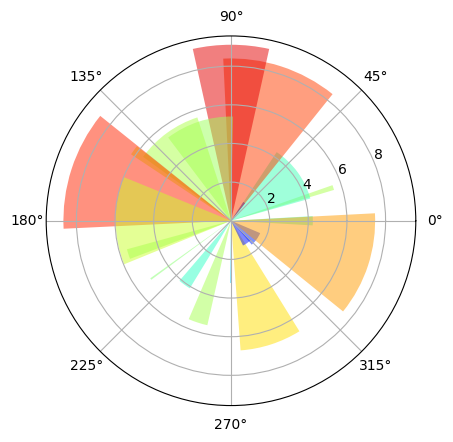

In [ ]:
N = 20
#polar bars have 3 channels (excluding color)
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N) #height of a bar
width = np.pi / 4 * np.random.rand(N) # opening angle of a bar

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

##Colormap and contour figures

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There is a number of predefined colormaps, and it is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see:
http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [ ]:
alpha = 0.7
phi_ext = 2 * pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * cos(phi_p)*cos(phi_m) - alpha * cos(phi_ext - 2*phi_p)

In [ ]:
phi_m = linspace(0, 2*pi, 100)
phi_p = linspace(0, 2*pi, 100)
X,Y = meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

In [ ]:
Z

array([[1.4       , 1.39839502, 1.39365447, ..., 1.39365447, 1.39839502,
        1.4       ],
       [1.40402665, 1.40241356, 1.39764872, ..., 1.39764872, 1.40241356,
        1.40402665],
       [1.41609037, 1.414453  , 1.40961539, ..., 1.40961539, 1.414453  ,
        1.41609037],
       ...,
       [1.41609037, 1.414453  , 1.40961539, ..., 1.40961539, 1.414453  ,
        1.41609037],
       [1.40402665, 1.40241356, 1.39764872, ..., 1.39764872, 1.40241356,
        1.40402665],
       [1.4       , 1.39839502, 1.39365447, ..., 1.39365447, 1.39839502,
        1.4       ]])

In [ ]:
X

array([[0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       ...,
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531],
       [0.        , 0.06346652, 0.12693304, ..., 6.15625227, 6.21971879,
        6.28318531]])

In [ ]:
Y

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.06346652, 0.06346652, 0.06346652, ..., 0.06346652, 0.06346652,
        0.06346652],
       [0.12693304, 0.12693304, 0.12693304, ..., 0.12693304, 0.12693304,
        0.12693304],
       ...,
       [6.15625227, 6.15625227, 6.15625227, ..., 6.15625227, 6.15625227,
        6.15625227],
       [6.21971879, 6.21971879, 6.21971879, ..., 6.21971879, 6.21971879,
        6.21971879],
       [6.28318531, 6.28318531, 6.28318531, ..., 6.28318531, 6.28318531,
        6.28318531]])

In [ ]:
x=-4
abs(x)

4

**pcolor**

Create a pseudocolor plot of a 2-D array. Can be very slow for large 2D arrays.

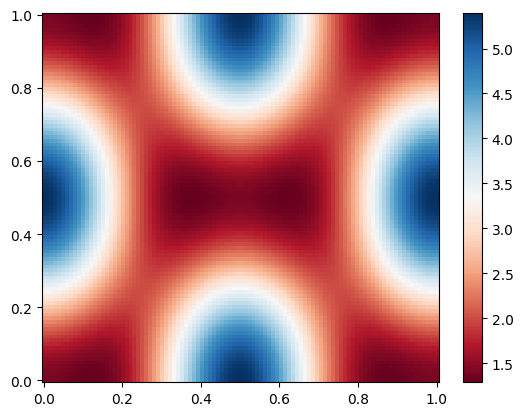

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*pi), Y/(2*pi), Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

**imshow**

Display an image on the axes.

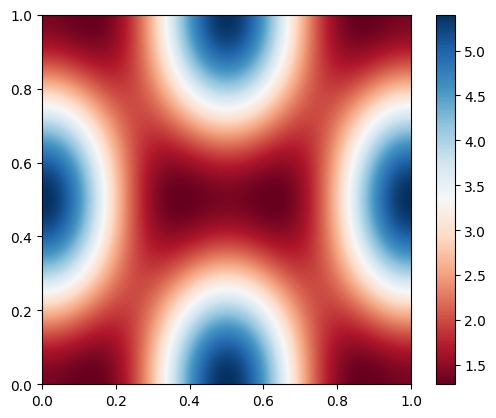

In [ ]:
fig, ax = plt.subplots()

im = imshow(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

Note that images can be interpolated and that indexig might vary. For interpolation in smaller arrays use `interpolation="nearest"`

###contour

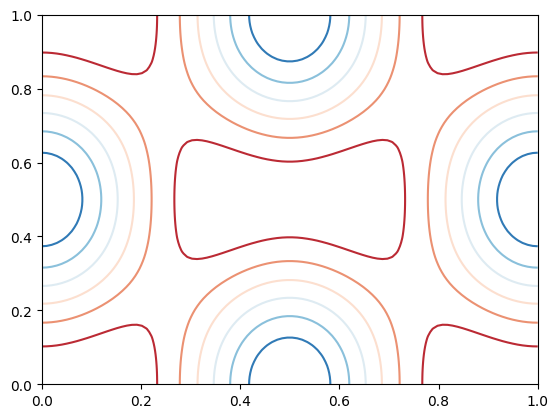

In [ ]:
fig, ax = plt.subplots()

cnt = contour(Z, cmap=cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

##3D figures

To use 3D graphics in matplotlib, we first need to create an axes instance of the class `Axes3D`. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes, but a conventient way to create a 3D axis instance is to use the `projection='3d'` keyword argument to the `add_axes` or `add_subplot` functions.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

###Surface plots

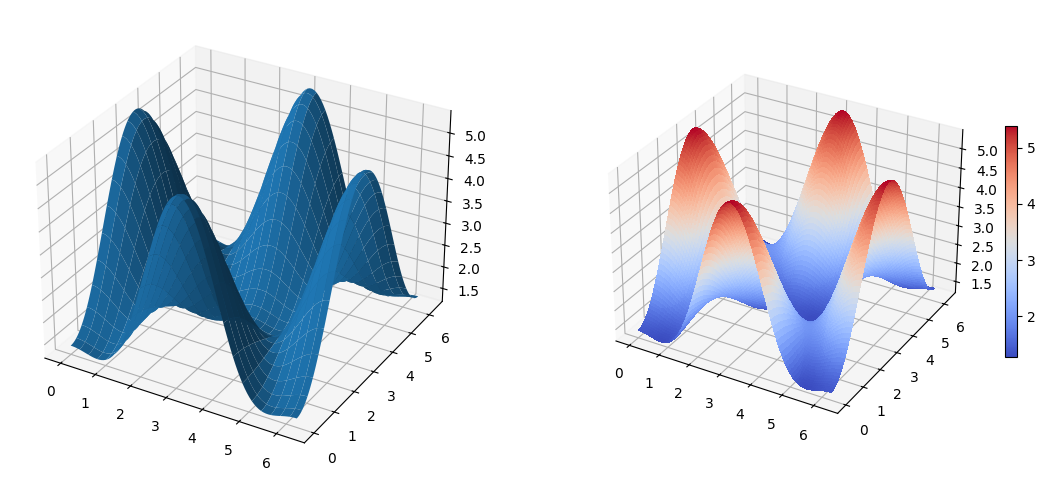

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance, because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

###Wire-frame plot

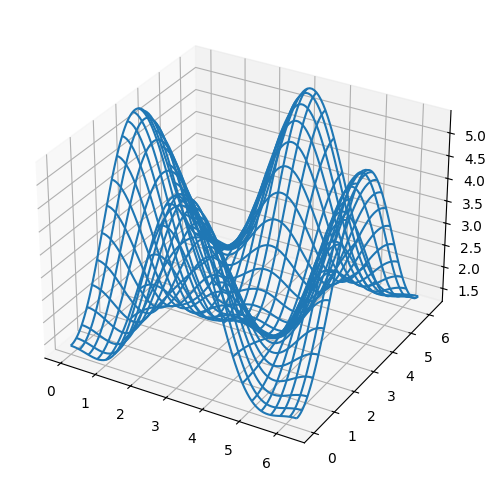

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

###Coutour plots with projections

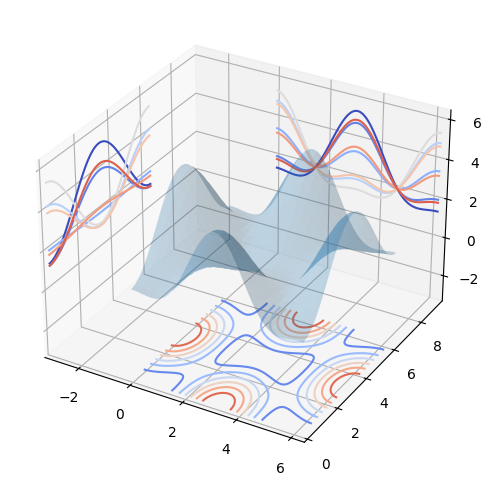

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-pi, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*pi, cmap=cm.coolwarm)

ax.set_xlim3d(-pi, 2*pi);
ax.set_ylim3d(0, 3*pi);
ax.set_zlim3d(-pi, 2*pi);

###Change the view angle

We can change the perspective of a 3D plot using the `view_init` function, which takes two arguments: the elevation and the azimuth angles (unit degrees)

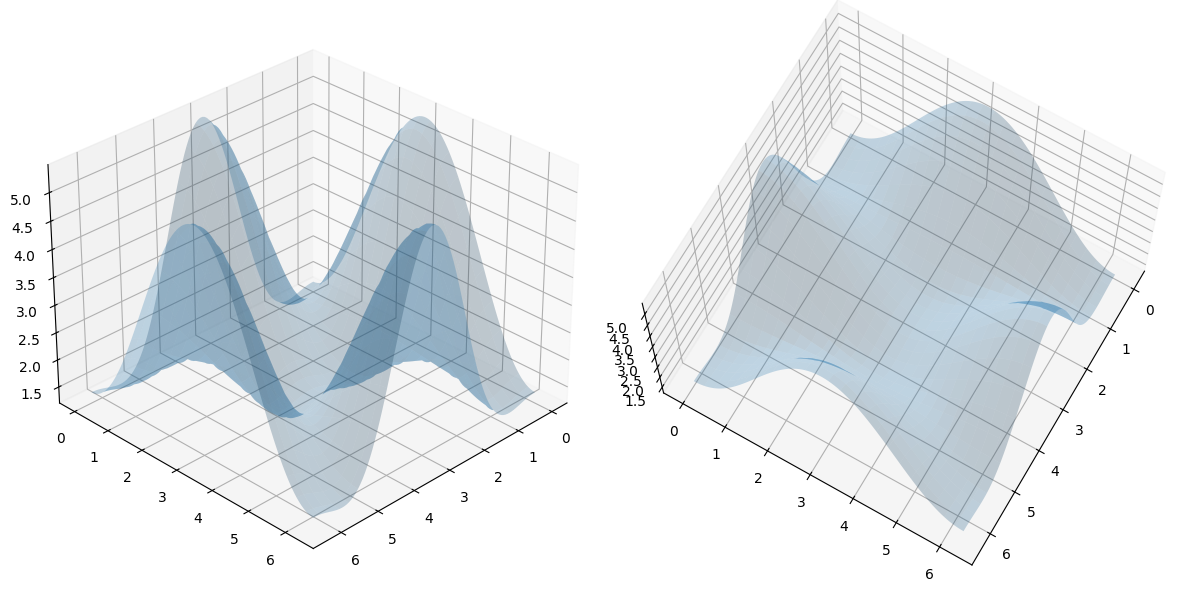

In [ ]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()